In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from google.colab import drive
import cv2 
from google.colab.patches import cv2_imshow
import pytesseract
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/archive.zip > /dev/null

In [ ]:
import os
img_path=[]
path = "/content/data/000/"
files = os.listdir(path)
for file in files:
    if file.endswith('.png'):
        img_path.append(path + file)
img_path.sort()

In [ ]:
for w in img_path:
  print(w)

/content/data/000/a01-000u.png
/content/data/000/a01-003u.png
/content/data/000/a01-007u.png
/content/data/000/a01-011u.png
/content/data/000/a01-014u.png
/content/data/000/a01-020u.png
/content/data/000/a01-026u.png
/content/data/000/a01-030u.png
/content/data/000/a01-043u.png
/content/data/000/a01-049u.png
/content/data/000/a01-049x.png
/content/data/000/a01-053u.png
/content/data/000/a01-058u.png
/content/data/000/a01-063u.png
/content/data/000/a01-068u.png
/content/data/000/a01-072u.png
/content/data/000/a01-077u.png
/content/data/000/a01-082u.png
/content/data/000/a01-087u.png
/content/data/000/a01-091u.png
/content/data/000/a01-096u.png
/content/data/000/a01-102u.png
/content/data/000/a01-107u.png
/content/data/000/a01-113u.png
/content/data/000/a01-117u.png
/content/data/000/a01-122u.png
/content/data/000/a01-128u.png
/content/data/000/a01-132u.png
/content/data/000/a01-132x.png
/content/data/000/a03-050.png
/content/data/000/a03-071.png
/content/data/000/a03-073.png
/content/da

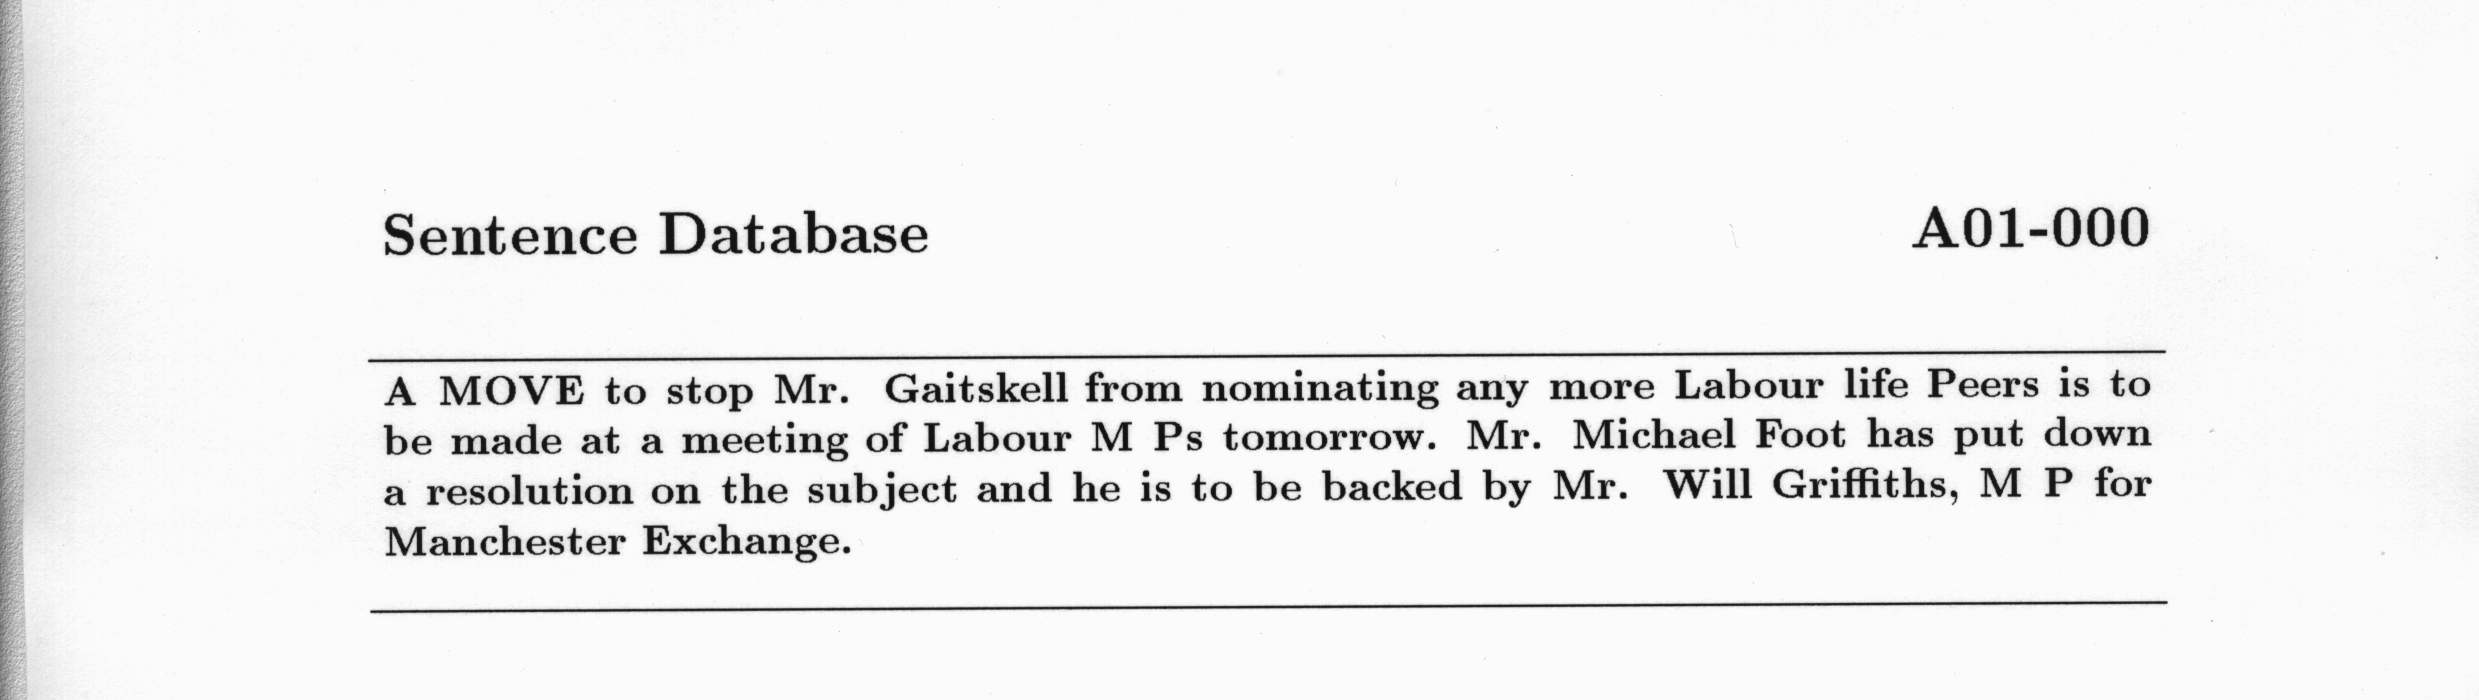

In [ ]:
img = cv2.imread(img_path[0])
img = img[0:700]
cv2_imshow(img)

In [ ]:
print(img_path[0])

/content/data/000/a01-000u.png


IMGAGE TO TEXT

In [ ]:
text=pytesseract.image_to_string(img)

In [ ]:
print(text)

 

Sentence Database A01-000

A MOVE to stop Mr. Gaitskell from nominating any more Labour life Peers is to
be made at a meeting of Labour M Ps tomorrow. Mr. Michael Foot has put down
a resolution on the subject and he is to be backed by Mr. Will Griffiths, M P for

Manchester Exchange.

 



TOKENIZE IMAGE 1

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
print(word_tokenize(text))

['Sentence', 'Database', 'A01-000', 'A', 'MOVE', 'to', 'stop', 'Mr.', 'Gaitskell', 'from', 'nominating', 'any', 'more', 'Labour', 'life', 'Peers', 'is', 'to', 'be', 'made', 'at', 'a', 'meeting', 'of', 'Labour', 'M', 'Ps', 'tomorrow', '.', 'Mr.', 'Michael', 'Foot', 'has', 'put', 'down', 'a', 'resolution', 'on', 'the', 'subject', 'and', 'he', 'is', 'to', 'be', 'backed', 'by', 'Mr.', 'Will', 'Griffiths', ',', 'M', 'P', 'for', 'Manchester', 'Exchange', '.']


STEMMING THE TEXT 1

In [ ]:
ps=PorterStemmer()
sent = word_tokenize(text)
for w in sent:
  print(w,":",ps.stem(w))

Sentence : sentenc
Database : databas
A01-000 : a01-000
A : a
MOVE : move
to : to
stop : stop
Mr. : mr.
Gaitskell : gaitskel
from : from
nominating : nomin
any : ani
more : more
Labour : labour
life : life
Peers : peer
is : is
to : to
be : be
made : made
at : at
a : a
meeting : meet
of : of
Labour : labour
M : m
Ps : ps
tomorrow : tomorrow
. : .
Mr. : mr.
Michael : michael
Foot : foot
has : ha
put : put
down : down
a : a
resolution : resolut
on : on
the : the
subject : subject
and : and
he : he
is : is
to : to
be : be
backed : back
by : by
Mr. : mr.
Will : will
Griffiths : griffith
, : ,
M : m
P : p
for : for
Manchester : manchest
Exchange : exchang
. : .


REMOVING THE STOPWORDS FROM TEXT 1

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words=set(stopwords.words('english'))
filter_text=[]
for w in word_tokenize(text):
  if not w in stop_words:
    filter_text.append(w)
print(filter_text)
text.join(filter_text)

['Sentence', 'Database', 'A01-000', 'A', 'MOVE', 'stop', 'Mr.', 'Gaitskell', 'nominating', 'Labour', 'life', 'Peers', 'made', 'meeting', 'Labour', 'M', 'Ps', 'tomorrow', '.', 'Mr.', 'Michael', 'Foot', 'put', 'resolution', 'subject', 'backed', 'Mr.', 'Will', 'Griffiths', ',', 'M', 'P', 'Manchester', 'Exchange', '.']


'Sentence \n\nSentence Database A01-000\n\nA MOVE to stop Mr. Gaitskell from nominating any more Labour life Peers is to\nbe made at a meeting of Labour M Ps tomorrow. Mr. Michael Foot has put down\na resolution on the subject and he is to be backed by Mr. Will Griffiths, M P for\n\nManchester Exchange.\n\n \n\x0cDatabase \n\nSentence Database A01-000\n\nA MOVE to stop Mr. Gaitskell from nominating any more Labour life Peers is to\nbe made at a meeting of Labour M Ps tomorrow. Mr. Michael Foot has put down\na resolution on the subject and he is to be backed by Mr. Will Griffiths, M P for\n\nManchester Exchange.\n\n \n\x0cA01-000 \n\nSentence Database A01-000\n\nA MOVE to stop Mr. Gaitskell from nominating any more Labour life Peers is to\nbe made at a meeting of Labour M Ps tomorrow. Mr. Michael Foot has put down\na resolution on the subject and he is to be backed by Mr. Will Griffiths, M P for\n\nManchester Exchange.\n\n \n\x0cA \n\nSentence Database A01-000\n\nA MOVE to stop Mr. Gait

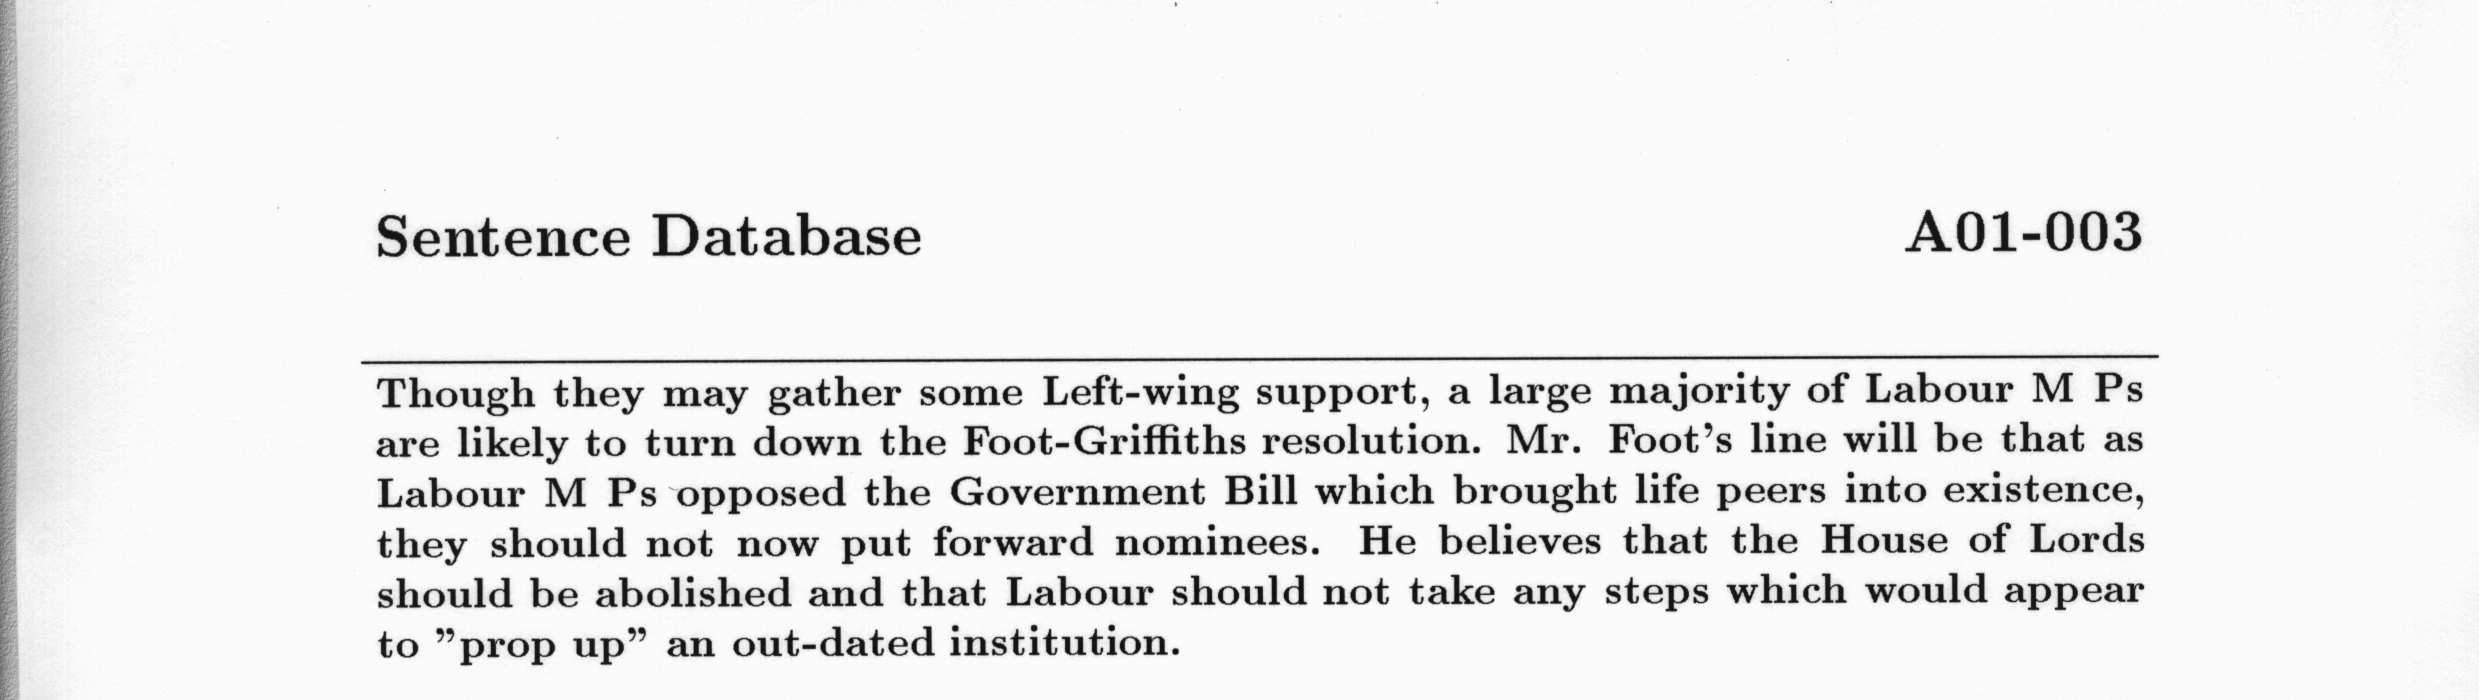

 

Sentence Database A01-003

Though they may gather some Left-wing support, a large majority of Labour M Ps
are likely to turn down the Foot-Griffiths resolution. Mr. Foot’s line will be that as
Labour M Ps opposed the Government Bill which brought life peers into existence,
they should not now put forward nominees. He believes that the House of Lords
should be abolished and that Labour should not take any steps which would appear
to ’prop up” an out-dated institution.



In [ ]:
img1=cv2.imread(img_path[1])
img1=img1[0:700]
text1=pytesseract.image_to_string(img1)
cv2_imshow(img1)
print(text1)

TOKENIZE IMAGE 2

In [ ]:
print(word_tokenize(text1))

['Sentence', 'Database', 'A01-003', 'Though', 'they', 'may', 'gather', 'some', 'Left-wing', 'support', ',', 'a', 'large', 'majority', 'of', 'Labour', 'M', 'Ps', 'are', 'likely', 'to', 'turn', 'down', 'the', 'Foot-Griffiths', 'resolution', '.', 'Mr.', 'Foot', '’', 's', 'line', 'will', 'be', 'that', 'as', 'Labour', 'M', 'Ps', 'opposed', 'the', 'Government', 'Bill', 'which', 'brought', 'life', 'peers', 'into', 'existence', ',', 'they', 'should', 'not', 'now', 'put', 'forward', 'nominees', '.', 'He', 'believes', 'that', 'the', 'House', 'of', 'Lords', 'should', 'be', 'abolished', 'and', 'that', 'Labour', 'should', 'not', 'take', 'any', 'steps', 'which', 'would', 'appear', 'to', '’', 'prop', 'up', '”', 'an', 'out-dated', 'institution', '.']


STEMMING TEXT 2

In [ ]:
ps=PorterStemmer()
sent = word_tokenize(text1)
for w in sent:
  print(w,":",ps.stem(w))

Sentence : sentenc
Database : databas
A01-003 : a01-003
Though : though
they : they
may : may
gather : gather
some : some
Left-wing : left-w
support : support
, : ,
a : a
large : larg
majority : major
of : of
Labour : labour
M : m
Ps : ps
are : are
likely : like
to : to
turn : turn
down : down
the : the
Foot-Griffiths : foot-griffith
resolution : resolut
. : .
Mr. : mr.
Foot : foot
’ : ’
s : s
line : line
will : will
be : be
that : that
as : as
Labour : labour
M : m
Ps : ps
opposed : oppos
the : the
Government : govern
Bill : bill
which : which
brought : brought
life : life
peers : peer
into : into
existence : exist
, : ,
they : they
should : should
not : not
now : now
put : put
forward : forward
nominees : nomine
. : .
He : he
believes : believ
that : that
the : the
House : hous
of : of
Lords : lord
should : should
be : be
abolished : abolish
and : and
that : that
Labour : labour
should : should
not : not
take : take
any : ani
steps : step
which : which
would : would
appear : appear
t

REMOVING THE STOPWORDS FROM TEXT 2

In [ ]:
stop_words=set(stopwords.words('english'))
filter_text=[]
for w in word_tokenize(text1):
  if not w in stop_words:
    filter_text.append(w)
print(filter_text)
text1.join(filter_text)

['Sentence', 'Database', 'A01-003', 'Though', 'may', 'gather', 'Left-wing', 'support', ',', 'large', 'majority', 'Labour', 'M', 'Ps', 'likely', 'turn', 'Foot-Griffiths', 'resolution', '.', 'Mr.', 'Foot', '’', 'line', 'Labour', 'M', 'Ps', 'opposed', 'Government', 'Bill', 'brought', 'life', 'peers', 'existence', ',', 'put', 'forward', 'nominees', '.', 'He', 'believes', 'House', 'Lords', 'abolished', 'Labour', 'take', 'steps', 'would', 'appear', '’', 'prop', '”', 'out-dated', 'institution', '.']


'Sentence \n\nSentence Database A01-003\n\nThough they may gather some Left-wing support, a large majority of Labour M Ps\nare likely to turn down the Foot-Griffiths resolution. Mr. Foot’s line will be that as\nLabour M Ps opposed the Government Bill which brought life peers into existence,\nthey should not now put forward nominees. He believes that the House of Lords\nshould be abolished and that Labour should not take any steps which would appear\nto ’prop up” an out-dated institution.\n\x0cDatabase \n\nSentence Database A01-003\n\nThough they may gather some Left-wing support, a large majority of Labour M Ps\nare likely to turn down the Foot-Griffiths resolution. Mr. Foot’s line will be that as\nLabour M Ps opposed the Government Bill which brought life peers into existence,\nthey should not now put forward nominees. He believes that the House of Lords\nshould be abolished and that Labour should not take any steps which would appear\nto ’prop up” an out-dated institution.\n\x0cA01-0

In [ ]:
first_sentence = text.split(" ")
second_sentence = text1.split(" ")
total= set(first_sentence).union(set(second_sentence))
print(total)

{'', 'Exchange.\n\n', 'line', 'large', 'Ps\nare', 'opposed', 'made', 'nominees.', 'not', 'appear\nto', 'MOVE', 'support,', 'abolished', 'Database', 'subject', 'stop', 'has', 'the', 'as\nLabour', 'He', 'A01-000\n\nA', 'he', 'Peers', 'would', 'that', 'Bill', 'Gaitskell', 'more', '\n\x0c', 'of', 'believes', 'which', 'tomorrow.', 'likely', 'at', 'life', 'Ps', 'by', 'some', 'resolution.', 'any', 'is', 'now', 'peers', 'meeting', 'Griffiths,', 'on', 'P', 'an', 'Government', 'Lords\nshould', 'may', 'Labour', 'for\n\nManchester', 'down\na', 'Will', 'take', 'Foot', 'Mr.', 'steps', '\n\nSentence', 'be', 'up”', 'forward', 'a', 'put', 'Left-wing', 'majority', 'and', 'turn', 'gather', 'into', 'to', 'will', 'A01-003\n\nThough', 'should', 'nominating', 'House', 'existence,\nthey', 'Foot’s', 'backed', 'institution.\n\x0c', 'Michael', '’prop', 'M', 'brought', 'out-dated', 'Foot-Griffiths', 'down', 'resolution', 'from', 'they', 'to\nbe'}


In [ ]:
wordDictA = dict.fromkeys(total, 0) 
wordDictB = dict.fromkeys(total, 0)
for word in first_sentence:
    wordDictA[word]+=1
    
for word in second_sentence:
    wordDictB[word]+=1

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame([wordDictA, wordDictB])

,,Exchange.\n\n,line,large,Ps\nare,opposed,made,nominees.,not,appear\nto,...,’prop,M,brought,out-dated,Foot-Griffiths,down,resolution,from,they,to\nbe
0,1,1,0,0,0,0,1,0,0,0,...,0,2,0,0,0,0,1,1,0,1
1,1,0,1,1,1,1,0,1,2,1,...,1,2,1,1,1,1,0,0,1,0


In [ ]:
def computeTF(wordDict, doc):
    tfDict = {}
    corpusCount = len(doc)
    for word, count in wordDict.items():
        tfDict[word] = count/float(corpusCount)
    return(tfDict)
#running our sentences through the tf function:
tfFirst = computeTF(wordDictA, first_sentence)
tfSecond = computeTF(wordDictB, second_sentence)
#Converting to dataframe for visualization
tf = pd.DataFrame([tfFirst, tfSecond])

In [ ]:
print (tf)

             Exchange.\n\n      line     large   Ps\nare   opposed      made  \
0  0.019231       0.019231  0.000000  0.000000  0.000000  0.000000  0.019231   
1  0.013514       0.000000  0.013514  0.013514  0.013514  0.013514  0.000000   

   nominees.       not  appear\nto  ...     ’prop         M   brought  \
0   0.000000  0.000000    0.000000  ...  0.000000  0.038462  0.000000   
1   0.013514  0.027027    0.013514  ...  0.013514  0.027027  0.013514   

   out-dated  Foot-Griffiths      down  resolution      from      they  \
0   0.000000        0.000000  0.000000    0.019231  0.019231  0.000000   
1   0.013514        0.013514  0.013514    0.000000  0.000000  0.013514   

     to\nbe  
0  0.019231  
1  0.000000  

[2 rows x 93 columns]


In [ ]:
import math
def computeIDF(docList):
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    print(idfDict)
    for word, val in idfDict.items():
        print(word,val)
        idfDict[word] = math.log10(N / (float(val) + 1))
        
    return(idfDict)
#inputing our sentences in the log file
idfs = computeIDF([wordDictA, wordDictB])
print(idfs)

{'': 0, 'Exchange.\n\n': 0, 'line': 0, 'large': 0, 'Ps\nare': 0, 'opposed': 0, 'made': 0, 'nominees.': 0, 'not': 0, 'appear\nto': 0, 'MOVE': 0, 'support,': 0, 'abolished': 0, 'Database': 0, 'subject': 0, 'stop': 0, 'has': 0, 'the': 0, 'as\nLabour': 0, 'He': 0, 'A01-000\n\nA': 0, 'he': 0, 'Peers': 0, 'would': 0, 'that': 0, 'Bill': 0, 'Gaitskell': 0, 'more': 0, '\n\x0c': 0, 'of': 0, 'believes': 0, 'which': 0, 'tomorrow.': 0, 'likely': 0, 'at': 0, 'life': 0, 'Ps': 0, 'by': 0, 'some': 0, 'resolution.': 0, 'any': 0, 'is': 0, 'now': 0, 'peers': 0, 'meeting': 0, 'Griffiths,': 0, 'on': 0, 'P': 0, 'an': 0, 'Government': 0, 'Lords\nshould': 0, 'may': 0, 'Labour': 0, 'for\n\nManchester': 0, 'down\na': 0, 'Will': 0, 'take': 0, 'Foot': 0, 'Mr.': 0, 'steps': 0, '\n\nSentence': 0, 'be': 0, 'up”': 0, 'forward': 0, 'a': 0, 'put': 0, 'Left-wing': 0, 'majority': 0, 'and': 0, 'turn': 0, 'gather': 0, 'into': 0, 'to': 0, 'will': 0, 'A01-003\n\nThough': 0, 'should': 0, 'nominating': 0, 'House': 0, 'existence

In [ ]:
tfidf=(tf/idfs)
print(tfidf)

             Exchange.\n\n      line     large   Ps\nare   opposed      made  \
0  0.063883       0.063883  0.000000  0.000000  0.000000  0.000000  0.063883   
1  0.044891       0.000000  0.044891  0.044891  0.044891  0.044891  0.000000   

   nominees.       not  appear\nto  ...     ’prop         M   brought  \
0   0.000000  0.000000    0.000000  ...  0.000000  0.127766  0.000000   
1   0.044891  0.089782    0.044891  ...  0.044891  0.089782  0.044891   

   out-dated  Foot-Griffiths      down  resolution      from      they  \
0   0.000000        0.000000  0.000000    0.063883  0.063883  0.000000   
1   0.044891        0.044891  0.044891    0.000000  0.000000  0.044891   

     to\nbe  
0  0.063883  
1  0.000000  

[2 rows x 93 columns]
